Importando as bibliotecas necessárias para a criação das análises exploratórias e do modelo de classificação

In [ ]:
#biblioteca pandas para manipulação do banco de dados
import pandas as pd
#numpy para realização de cálculos
import numpy as np
#biblioteca matplotlib para criação dos gráficos
import matplotlib.pyplot as plt
#biblioteca seaborn para criação dos gráficos
import seaborn as sns
#criar o ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
#padroniza as variáveis
from sklearn.preprocessing import StandardScaler
#regressão logística
from sklearn.linear_model import LogisticRegression
#Validação do modelo por grid e cross validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#modelo random forest
from sklearn.ensemble import RandomForestClassifier
#biblioteca sklearn.metrics para definição das métricas de avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,\
classification_report, roc_auc_score, roc_curve, recall_score

%matplotlib inline

Importando os dados

In [ ]:
#armazena o caminho dos dados em uma variável
caminho = 'base_churn.xlsx'
#lendo o arquivo excel
dados_brutos = pd.read_excel(caminho)
#um head() dos dados contendo as 5 primeiras linhas
dados_brutos.head()

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADENAADESÃO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE
0,53100,TITULAR,NÃO,Média renda,39,302,F,RJ,NÃO,12,1,1030.0
1,140400,TITULAR,NÃO,Média renda,24,307,F,BA,NÃO,4,0,720.0
2,105059,TITULAR,NÃO,Média renda,1,295,M,MG,NÃO,6,7,NaN
3,82963,TITULAR,NÃO,Média renda,36,294,M,RJ,NÃO,21,1,1030.0
4,97768,TITULAR,SIM,Baixa renda,20,259,F,RN,NÃO,30,0,550.0


Análise exploratória dos dados

In [ ]:
#lista de colunas onde queremos fazer o replace
colunas_para_alterar = ['INADIMPLENTE', 'SEXO']

# Substituir nas colunas especificadas
dados_brutos[colunas_para_alterar] = dados_brutos[colunas_para_alterar].replace({
    'SIM': 'INADIMPLENTE',
    'NÃO': 'NAO_INADIMPLENTE',
    'M': 'MASCULINO',
    'F': 'FEMININO'
    })

In [ ]:
#avalia os tipos de variáveis e se alguma precisa ser modificada
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101063 entries, 0 to 101062
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_CLIENTE            101063 non-null  int64  
 1   TITULARIDADE          101063 non-null  object 
 2   CANCELADO             101063 non-null  object 
 3   FAIXA_RENDA           101063 non-null  object 
 4   IDADENAADESÃO         101063 non-null  int64  
 5   TEMPO_DE_PLANO_MESES  101063 non-null  int64  
 6   SEXO                  99069 non-null   object 
 7   UF                    99027 non-null   object 
 8   INADIMPLENTE          101063 non-null  object 
 9   QTD_CONSULTAS_12M     101063 non-null  int64  
 10  QTD_INTERNACOES_12M   101063 non-null  int64  
 11  VALOR_MENSALIDADE     63861 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 9.3+ MB


In [ ]:
#quantidade de linhas e colunas do banco de dados
dados_brutos.shape

(101063, 12)

In [ ]:
#renomeando a coluna IDADENAADESÃO
dados = dados_brutos.rename(columns={'IDADENAADESÃO': 'IDADE_NA_ADESAO'})
dados.head(1)

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE
0,53100,TITULAR,NÃO,Média renda,39,302,FEMININO,RJ,NAO_INADIMPLENTE,12,1,1030.0


In [ ]:
#tabela de frequência
def tabela_de_frequencias(dados):
  resultados = []

  for i in dados.select_dtypes(include=['object']).columns:
    value_counts = dados[i].value_counts().sort_index().reset_index()
    value_counts.columns = ['Valor', 'Frequencia']
    value_counts['Variavel'] = i  # Adiciona uma coluna com o nome da coluna
    resultados.append(value_counts)

  dados_resultados = pd.concat(resultados, ignore_index=True)
  return dados_resultados

In [ ]:
#tabela de frequência
dados_resultados = tabela_de_frequencias(dados)
print("\033[92m Tabela de Frequência\n")
dados_resultados

 Tabela de Frequência



,Valor,Frequencia,Variavel
0,DEPENDENTE,1,TITULARIDADE
1,TITULAR,101062,TITULARIDADE
2,NÃO,41622,CANCELADO
3,SIM,59441,CANCELADO
4,Alta renda,11152,FAIXA_RENDA
5,Baixa renda,65001,FAIXA_RENDA
6,Média renda,24910,FAIXA_RENDA
7,FEMININO,56480,SEXO
8,MASCULINO,42589,SEXO
9,AC,130,UF


In [ ]:
# calculando média de BMI agrupada por Stroke
media_agrupada_bmi = dados.groupby('CANCELADO')['VALOR_MENSALIDADE'].mean().round(2)
media_agrupada_bmi_df = media_agrupada_bmi.reset_index()

# convertendo a variavel resposta em objeto
media_agrupada_bmi_df['CANCELADO'] = media_agrupada_bmi_df['CANCELADO'].astype(object)
media_agrupada_bmi_df.columns = ['CANCELADO', 'Média VALOR_MENSALIDADE']
display(media_agrupada_bmi_df)

,CANCELADO,Média VALOR_MENSALIDADE
0,NÃO,898.52
1,SIM,928.95


In [ ]:
#variáveis categoricas
dados['FAIXA_RENDA'].unique()

array(['Média renda', 'Baixa renda', 'Alta renda'], dtype=object)

In [ ]:
#categorias salvas
categorias =  ['Baixa renda', 'Média renda', 'Alta renda']

In [ ]:
#ordena as categorias
enc = OrdinalEncoder(categories=[categorias])

In [ ]:
#aplica a ordenação na variável desejada
dados['FAIXA_RENDA'] = enc.fit_transform(dados[['FAIXA_RENDA']])
dados.head()

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE
0,53100,TITULAR,NÃO,1.0,39,302,FEMININO,RJ,NAO_INADIMPLENTE,12,1,1030.0
1,140400,TITULAR,NÃO,1.0,24,307,FEMININO,BA,NAO_INADIMPLENTE,4,0,720.0
2,105059,TITULAR,NÃO,1.0,1,295,MASCULINO,MG,NAO_INADIMPLENTE,6,7,NaN
3,82963,TITULAR,NÃO,1.0,36,294,MASCULINO,RJ,NAO_INADIMPLENTE,21,1,1030.0
4,97768,TITULAR,SIM,0.0,20,259,FEMININO,RN,NAO_INADIMPLENTE,30,0,550.0


In [ ]:
#cria e recodifica uma nova variável resposta
#CANCELADO
dados.loc[dados['CANCELADO'] != "NÃO" , 'CANCELADO_USAR'] = 1
dados.loc[dados['CANCELADO'] == "NÃO", 'CANCELADO_USAR'] = 0
#FAIXO DE RENDA
dados.loc[dados['FAIXA_RENDA'] == 0 , 'FAIXA_RENDA_USAR'] = "Baixa renda"
dados.loc[dados['FAIXA_RENDA'] == 1, 'FAIXA_RENDA_USAR'] = "Média renda"
dados.loc[dados['FAIXA_RENDA'] == 2, 'FAIXA_RENDA_USAR'] = "Alta renda"
dados.head()

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR,FAIXA_RENDA_USAR
0,53100,TITULAR,NÃO,1.0,39,302,FEMININO,RJ,NAO_INADIMPLENTE,12,1,1030.0,0.0,Média renda
1,140400,TITULAR,NÃO,1.0,24,307,FEMININO,BA,NAO_INADIMPLENTE,4,0,720.0,0.0,Média renda
2,105059,TITULAR,NÃO,1.0,1,295,MASCULINO,MG,NAO_INADIMPLENTE,6,7,NaN,0.0,Média renda
3,82963,TITULAR,NÃO,1.0,36,294,MASCULINO,RJ,NAO_INADIMPLENTE,21,1,1030.0,0.0,Média renda
4,97768,TITULAR,SIM,0.0,20,259,FEMININO,RN,NAO_INADIMPLENTE,30,0,550.0,1.0,Baixa renda


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101063 entries, 0 to 101062
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_CLIENTE            101063 non-null  int64  
 1   TITULARIDADE          101063 non-null  object 
 2   CANCELADO             101063 non-null  object 
 3   FAIXA_RENDA           101063 non-null  float64
 4   IDADE_NA_ADESAO       101063 non-null  int64  
 5   TEMPO_DE_PLANO_MESES  101063 non-null  int64  
 6   SEXO                  99069 non-null   object 
 7   UF                    99027 non-null   object 
 8   INADIMPLENTE          101063 non-null  object 
 9   QTD_CONSULTAS_12M     101063 non-null  int64  
 10  QTD_INTERNACOES_12M   101063 non-null  int64  
 11  VALOR_MENSALIDADE     63861 non-null   float64
 12  CANCELADO_USAR        101063 non-null  float64
 13  FAIXA_RENDA_USAR      101063 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 10.

In [ ]:
#estatísticas univariadas (ID_CLIENTE não é variável conínua)
dados.describe()

,ID_CLIENTE,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR
count,101063.000000,101063.000000,101063.000000,101063.000000,101063.000000,101063.000000,63861.000000,101063.000000
mean,97215.004552,0.467174,30.868755,258.845047,12.099354,1.303326,916.413774,0.588158
std,27276.649636,0.685289,27.656371,50.268563,10.769351,1.295004,396.843048,0.492169
min,50000.000000,0.000000,-19.000000,-22.000000,1.000000,0.000000,550.000000,0.000000
25%,73596.000000,0.000000,12.000000,221.000000,5.000000,1.000000,550.000000,0.000000
50%,97187.000000,0.000000,29.000000,281.000000,9.000000,1.000000,720.000000,1.000000
75%,120831.500000,1.000000,42.000000,301.000000,15.000000,2.000000,1030.000000,1.000000
max,144497.000000,2.000000,249.000000,311.000000,60.000000,9.000000,1870.000000,1.000000


*Observações: existem valores negativos para a idade e tempo de plano, possivelmente foi um erro de digitação.*

---



*Médias*

*Tempo de plano em meses: 258*


*Consultas em 12 meses: 12*


*Internações em 12 meses: 1,3*


*Valor mensal: 916 reais*

Verificando valores faltantes


In [ ]:
#quantidade de valores negativos
negativos = dados[dados['IDADE_NA_ADESAO'] < 0]
negativos['IDADE_NA_ADESAO'].value_counts()

,count
IDADE_NA_ADESAO,
-19,69
-3,65
-9,64
-8,59
-16,57
-15,54
-10,53
-13,51
-1,51


In [ ]:
#convertendo valores negativos em positivos
dados['IDADE_NA_ADESAO'] = dados['IDADE_NA_ADESAO'].abs()
dados['TEMPO_DE_PLANO_MESES'] = dados['TEMPO_DE_PLANO_MESES'].abs()

In [ ]:
#investigando se ocorreu tudo bem para a variável idade
negativos1 = dados[dados['IDADE_NA_ADESAO'] < 0]
negativos1['IDADE_NA_ADESAO'].value_counts()

,count
IDADE_NA_ADESAO,


In [ ]:
#avalia se ocorreu tudo bem
negativos2 = dados[dados['TEMPO_DE_PLANO_MESES'] < 0]
negativos2['TEMPO_DE_PLANO_MESES'].value_counts()


,count
TEMPO_DE_PLANO_MESES,


In [ ]:
#estatísticas univariadas (ID_CLIENTE e CANCELADO_usar não é variável conínua) para confirmar a conversão em valores negativos em absolutos
dados.describe()

,ID_CLIENTE,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR
count,101063.000000,101063.000000,101063.000000,101063.000000,101063.000000,101063.000000,63861.000000,101063.000000
mean,97215.004552,0.467174,31.062278,258.845918,12.099354,1.303326,916.413774,0.588158
std,27276.649636,0.685289,27.438835,50.264079,10.769351,1.295004,396.843048,0.492169
min,50000.000000,0.000000,0.000000,22.000000,1.000000,0.000000,550.000000,0.000000
25%,73596.000000,0.000000,12.000000,221.000000,5.000000,1.000000,550.000000,0.000000
50%,97187.000000,0.000000,29.000000,281.000000,9.000000,1.000000,720.000000,1.000000
75%,120831.500000,1.000000,42.000000,301.000000,15.000000,2.000000,1030.000000,1.000000
max,144497.000000,2.000000,249.000000,311.000000,60.000000,9.000000,1870.000000,1.000000


In [ ]:
#nomes das colunas do tipo "objeto"
dados.select_dtypes(include="object").columns

Index(['TITULARIDADE', 'CANCELADO', 'SEXO', 'UF', 'INADIMPLENTE',
       'FAIXA_RENDA_USAR'],
      dtype='object')

In [ ]:
#quantidade de valores faltantes em cada variável
print("\033[92m \n--------------Valores Absolutos--------------------\n", "\033[97m \n", dados.isna().sum())
print("\033[92m \n--------------Valores Percentuais--------------------\n", "\033[97m \n", dados.isna().sum()/dados.shape[0]*100)

 
--------------Valores Absolutos--------------------
  
 ID_CLIENTE                  0
TITULARIDADE                0
CANCELADO                   0
FAIXA_RENDA                 0
IDADE_NA_ADESAO             0
TEMPO_DE_PLANO_MESES        0
SEXO                     1994
UF                       2036
INADIMPLENTE                0
QTD_CONSULTAS_12M           0
QTD_INTERNACOES_12M         0
VALOR_MENSALIDADE       37202
CANCELADO_USAR              0
FAIXA_RENDA_USAR            0
dtype: int64
 
--------------Valores Percentuais--------------------
  
 ID_CLIENTE               0.000000
TITULARIDADE             0.000000
CANCELADO                0.000000
FAIXA_RENDA              0.000000
IDADE_NA_ADESAO          0.000000
TEMPO_DE_PLANO_MESES     0.000000
SEXO                     1.973027
UF                       2.014585
INADIMPLENTE             0.000000
QTD_CONSULTAS_12M        0.000000
QTD_INTERNACOES_12M      0.000000
VALOR_MENSALIDADE       36.810702
CANCELADO_USAR           0.000000
FAIXA_R

*Observações: existem valores faltantes nas variáveis SEXO, UF e VALOR MENSALIDADE, porém temos um percentual maior em valor da mensalidade então iremos inputar valores utilizando o KNN e testar. Se removermos as linhas com valores faltantes será removido mais de 36% do tamanho do banco de dados, perdendo assim, muita informação.*

Tratamento de valores faltantes

In [ ]:
#biblioteca KNN para imputar valores com base nos valores vizinhos
from sklearn.impute import KNNImputer
#função em uma variável
impute = KNNImputer(n_neighbors=5)

In [ ]:
#imputa os valores
dados['VALOR_MENSALIDADE'] = impute.fit_transform(dados[['VALOR_MENSALIDADE']])

In [ ]:
print("\033[92m \n--------------Valores Absolutos--------------------\n", "\033[97m \n", dados.isna().sum())

 
--------------Valores Absolutos--------------------
  
 ID_CLIENTE                 0
TITULARIDADE               0
CANCELADO                  0
FAIXA_RENDA                0
IDADE_NA_ADESAO            0
TEMPO_DE_PLANO_MESES       0
SEXO                    1994
UF                      2036
INADIMPLENTE               0
QTD_CONSULTAS_12M          0
QTD_INTERNACOES_12M        0
VALOR_MENSALIDADE          0
CANCELADO_USAR             0
FAIXA_RENDA_USAR           0
dtype: int64


In [ ]:
#verifica se as classes da variável resposta são balanceadas
COUNT1 = dados['CANCELADO'].value_counts()
COUNT1

,count
CANCELADO,
SIM,59441
NÃO,41622


In [ ]:
#diferença entre as classes
print("Diferença de: ",COUNT1[0]-COUNT1[1])

Diferença de:  17819


/tmp/ipython-input-31-2840477565.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Diferença de: ",COUNT1[0]-COUNT1[1])


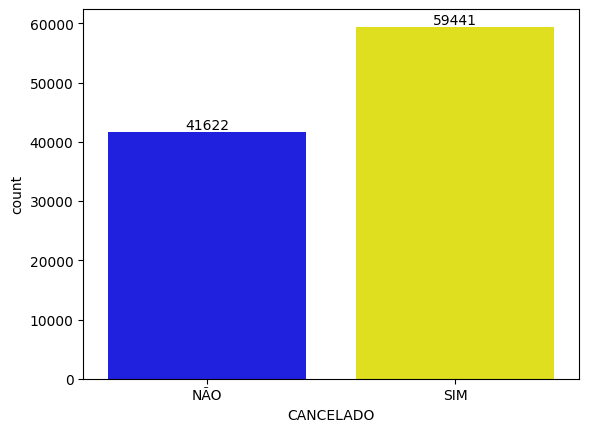

In [ ]:
#gráfico countplot
palette=['blue', 'yellow']
ax = sns.countplot(data=dados, x='CANCELADO', hue='CANCELADO', palette=palette)

#legenda
#ax.legend(labels=['não churn', 'churn'])

#rótulos de dados
for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição x centralizada
        altura + 0.5,                    # posição y (acima da barra)
        int(altura),                     # valor da contagem
        ha='center',                     # alinhamento horizontal
        va='bottom'                      # alinhamento vertical
    )
plt.show()

In [ ]:
#quantidade de valores faltantes na variavel alvo por sexo
contagem_por_SEXO = dados.groupby('CANCELADO')['SEXO'].value_counts(dropna=False).reset_index(name='contagem')

print(contagem_por_SEXO)

  CANCELADO       SEXO  contagem
0       NÃO   FEMININO     23861
1       NÃO  MASCULINO     16955
2       NÃO        NaN       806
3       SIM   FEMININO     32619
4       SIM  MASCULINO     25634
5       SIM        NaN      1188


In [ ]:
print('Percentual de valores faltantes SEXO na classe CANCELADO:', round((1188/59441)*100),"%")
print('Percentual de valores faltantes SEXO na classe NÃO CANCELADO:', round((806/41622)*100),"%")

Percentual de valores faltantes SEXO na classe CANCELADO: 2 %
Percentual de valores faltantes SEXO na classe NÃO CANCELADO: 2 %


#**Observação:**

Sendo percentuais baixos iremos remover os valores faltantes para a variável sexo

In [ ]:
#remove os valores faltantes da variável SEXO
dados.dropna(subset=['SEXO'], inplace=True)
dados.isna().sum()

,0
ID_CLIENTE,0
TITULARIDADE,0
CANCELADO,0
FAIXA_RENDA,0
IDADE_NA_ADESAO,0
TEMPO_DE_PLANO_MESES,0
SEXO,0
UF,2001
INADIMPLENTE,0
QTD_CONSULTAS_12M,0


In [ ]:
#quantidade de valores faltantes na variavel alvo
contagem_por_uf = dados.groupby('CANCELADO')['UF'].value_counts(dropna=False).reset_index(name='contagem')
contagem_por_uf.columns = ['CANCELADO', 'UF','Contagem']
display(contagem_por_uf)

,CANCELADO,UF,Contagem
0,NÃO,BA,6297
1,NÃO,SP,5926
2,NÃO,RJ,5908
3,NÃO,DF,3545
4,NÃO,MG,2878
5,NÃO,PE,2623
6,NÃO,MA,2501
7,NÃO,RS,1435
8,NÃO,SE,1214
9,NÃO,AL,989


In [ ]:
#quantidade de valores para cada classe da variável alvo
dados['CANCELADO'].value_counts()

,count
CANCELADO,
SIM,58253
NÃO,40816


In [ ]:
print('Percentual de valores faltantes UF na classe CANCELADO:', round((1199/58253)*100),"%")
print('Percentual de valores faltantes UF na classe NÃO CANCELADO:', round((802/40816)*100),"%")

Percentual de valores faltantes UF na classe CANCELADO: 2 %
Percentual de valores faltantes UF na classe NÃO CANCELADO: 2 %


In [ ]:
#remove os valores faltantes da variável UF
dados.dropna(subset=['UF'], inplace=True)
dados.isna().sum()

,0
ID_CLIENTE,0
TITULARIDADE,0
CANCELADO,0
FAIXA_RENDA,0
IDADE_NA_ADESAO,0
TEMPO_DE_PLANO_MESES,0
SEXO,0
UF,0
INADIMPLENTE,0
QTD_CONSULTAS_12M,0


Tratamento de valores duplicados

In [ ]:
#total de dados duplicados
print(dados.duplicated().sum())
print(f'{dados.duplicated().sum()/dados.shape[0]:.3f}')

6303
0.065


In [ ]:
#remove os dados duplicados
dados.drop_duplicates(inplace=True)
dados.shape

(90765, 14)

In [ ]:
#confere a remoção
print(dados.duplicated().sum())

0


##Análise gráfica



In [ ]:
#define faixas de tempo de contrato
bins = [0, 250, 311]
labels = ['abaixo de 250 meses', 'acima de 250 meses']

#cria a variável categórica com base na variável contínua
dados['faixa_tempo_plano'] = pd.cut(dados['TEMPO_DE_PLANO_MESES'], bins=bins, labels=labels)
dados.head()

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR,FAIXA_RENDA_USAR,faixa_tempo_plano
0,53100,TITULAR,NÃO,1.0,39,302,FEMININO,RJ,NAO_INADIMPLENTE,12,1,1030.000000,0.0,Média renda,acima de 250 meses
1,140400,TITULAR,NÃO,1.0,24,307,FEMININO,BA,NAO_INADIMPLENTE,4,0,720.000000,0.0,Média renda,acima de 250 meses
2,105059,TITULAR,NÃO,1.0,1,295,MASCULINO,MG,NAO_INADIMPLENTE,6,7,916.413774,0.0,Média renda,acima de 250 meses
3,82963,TITULAR,NÃO,1.0,36,294,MASCULINO,RJ,NAO_INADIMPLENTE,21,1,1030.000000,0.0,Média renda,acima de 250 meses
4,97768,TITULAR,SIM,0.0,20,259,FEMININO,RN,NAO_INADIMPLENTE,30,0,550.000000,1.0,Baixa renda,acima de 250 meses


In [ ]:
#tempo de plano pela variável alvo
cont_agrupada_tempo = dados.groupby('CANCELADO')['faixa_tempo_plano'].value_counts()
cont_agrupada_tempo_df = cont_agrupada_tempo.reset_index()
cont_agrupada_tempo_df.columns = ['CANCELADO', 'faixa_tempo_plano','Contagem']
display(cont_agrupada_tempo_df)

,CANCELADO,faixa_tempo_plano,Contagem
0,NÃO,acima de 250 meses,37370
1,NÃO,abaixo de 250 meses,2
2,SIM,abaixo de 250 meses,32894
3,SIM,acima de 250 meses,20499


In [ ]:
#SEXO pela variável alvo
cont_agrupada_sexo = dados.groupby('CANCELADO')['SEXO'].value_counts()
cont_agrupada_sexo_df = cont_agrupada_sexo.reset_index()
cont_agrupada_sexo_df.columns = ['CANCELADO', 'SEXO','Contagem']
display(cont_agrupada_sexo_df)

,CANCELADO,SEXO,Contagem
0,NÃO,FEMININO,21858
1,NÃO,MASCULINO,15514
2,SIM,FEMININO,29918
3,SIM,MASCULINO,23475


In [ ]:
#TITULARRIDADE pela variável alvo
cont_agrupada_TITU = dados.groupby('CANCELADO')['TITULARIDADE'].value_counts()
cont_agrupada_TITU_df = cont_agrupada_TITU.reset_index()
cont_agrupada_TITU_df.columns = ['CANCELADO', 'TITULARIDADE','Contagem']
display(cont_agrupada_TITU_df)

,CANCELADO,TITULARIDADE,Contagem
0,NÃO,TITULAR,37371
1,NÃO,DEPENDENTE,1
2,SIM,TITULAR,53393


In [ ]:
#inadimplência pela variável alvo
cont_agrupada_INAD = dados.groupby('CANCELADO')['INADIMPLENTE'].value_counts()
cont_agrupada_INAD_df = cont_agrupada_INAD.reset_index()
cont_agrupada_INAD_df.columns = ['CANCELADO', 'INADIMPLENTE','Contagem']
display(cont_agrupada_INAD_df)

,CANCELADO,INADIMPLENTE,Contagem
0,NÃO,NAO_INADIMPLENTE,34415
1,NÃO,INADIMPLENTE,2957
2,SIM,NAO_INADIMPLENTE,32031
3,SIM,INADIMPLENTE,21362


In [ ]:
#FAIXA DE RENDA pela variável alvo
cont_agrupada_RENDA = dados.groupby('CANCELADO')['FAIXA_RENDA_USAR'].value_counts()
cont_agrupada_RENDA_df = cont_agrupada_RENDA.reset_index()
cont_agrupada_RENDA_df.columns = ['CANCELADO', 'FAIXA_RENDA_USAR','Contagem']
display(cont_agrupada_RENDA_df)

,CANCELADO,FAIXA_RENDA_USAR,Contagem
0,NÃO,Média renda,22362
1,NÃO,Baixa renda,7594
2,NÃO,Alta renda,7416
3,SIM,Baixa renda,50738
4,SIM,Alta renda,2655


In [ ]:
#FAIXA DE RENDA pela variável alvo
cont_agrupada_UF = dados.groupby('CANCELADO')['UF'].value_counts()
cont_agrupada_UF_df = cont_agrupada_UF.reset_index()
cont_agrupada_UF_df.columns = ['CANCELADO', 'UF','Contagem']
display(cont_agrupada_UF_df)

,CANCELADO,UF,Contagem
0,NÃO,BA,5874
1,NÃO,SP,5521
2,NÃO,RJ,5520
3,NÃO,DF,3307
4,NÃO,MG,2694
5,NÃO,PE,2455
6,NÃO,MA,2345
7,NÃO,RS,1333
8,NÃO,SE,1133
9,NÃO,AL,928


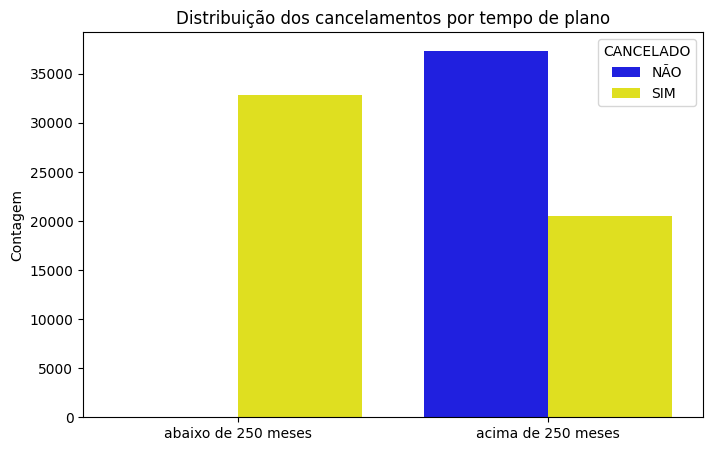

In [ ]:
#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="faixa_tempo_plano", y="Contagem", hue="CANCELADO", data=cont_agrupada_tempo_df, palette=palette)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por tempo de plano")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

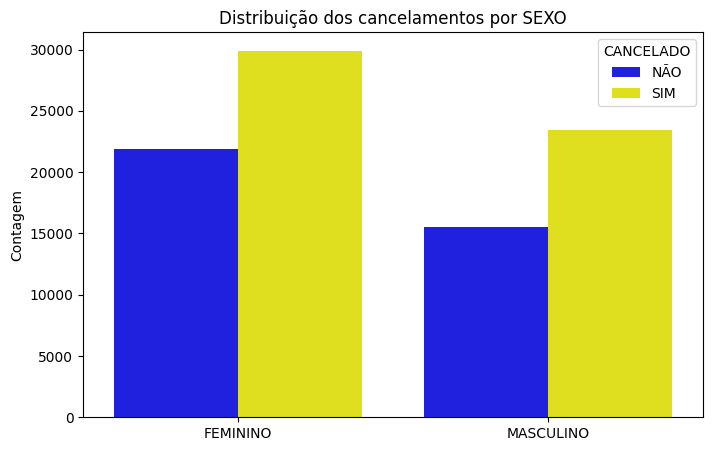

In [ ]:
#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="SEXO", y="Contagem", hue="CANCELADO", data=cont_agrupada_sexo_df, palette=palette)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por SEXO")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

Teste estatístico para proporção

In [ ]:
# Tabela de frequência: número de cancelamentos por sexo
cancelamentos = dados[dados['CANCELADO'] == 'SIM']['SEXO'].value_counts()

# Total por sexo
total_por_sexo = dados['SEXO'].value_counts()

print("Cancelamentos:\n", cancelamentos)
print("Total por sexo:\n", total_por_sexo)

Cancelamentos:
 SEXO
FEMININO     29918
MASCULINO    23475
Name: count, dtype: int64
Total por sexo:
 SEXO
FEMININO     51776
MASCULINO    38989
Name: count, dtype: int64


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Valores
count = [cancelamentos['MASCULINO'], cancelamentos['FEMININO']]         # número de sucessos (cancelamentos)
nobs = [total_por_sexo['MASCULINO'], total_por_sexo['FEMININO']]         # número de observações em cada grupo

stat, pval = proportions_ztest(count, nobs)

print(f"Estatística z = {stat:.4f}")
print(f"p-valor = {pval:.4f}")


Estatística z = 7.3507
p-valor = 0.0000


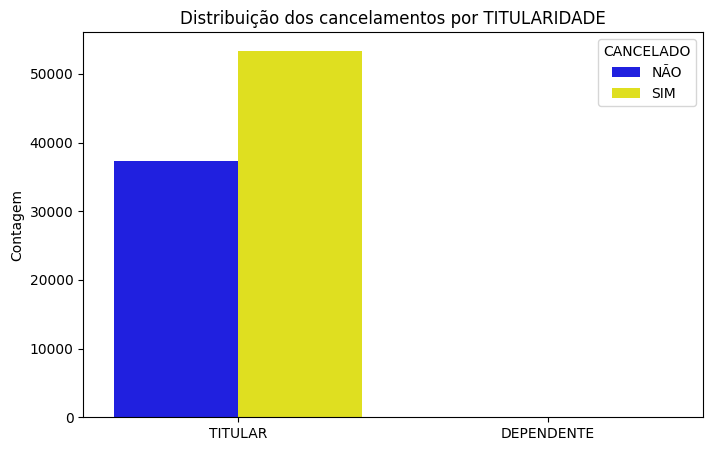

In [ ]:
#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="TITULARIDADE", y="Contagem", hue="CANCELADO", data=cont_agrupada_TITU_df, palette=palette)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por TITULARIDADE")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

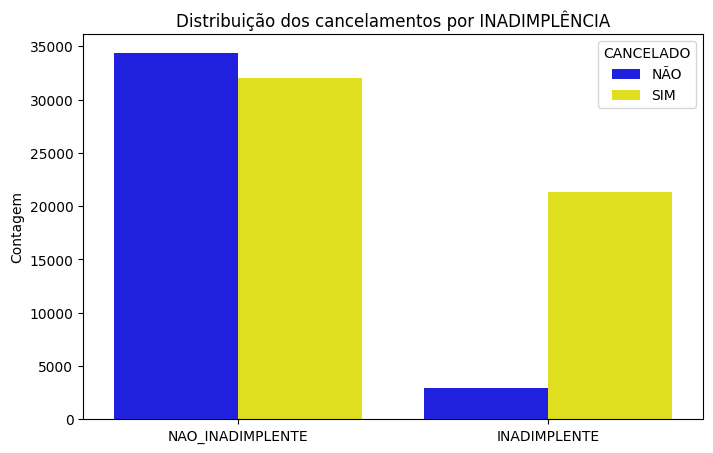

In [ ]:
#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="INADIMPLENTE", y="Contagem", hue="CANCELADO", data=cont_agrupada_INAD_df, palette=palette)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por INADIMPLÊNCIA")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

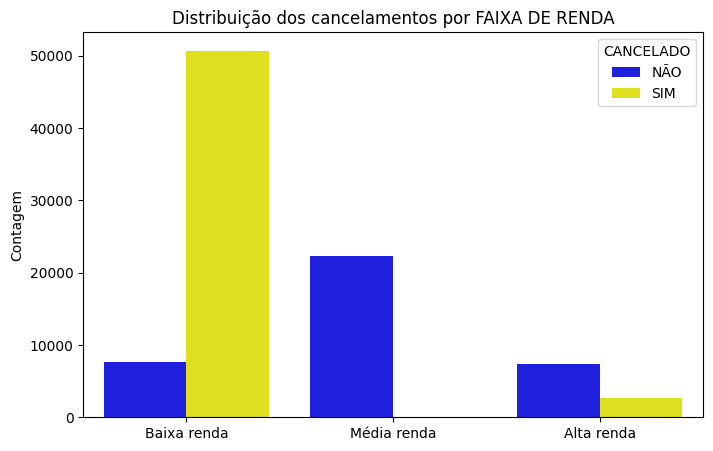

In [ ]:
#ordem desejada de plotagem
ordem = ['Baixa renda', 'Média renda', 'Alta renda']

#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="FAIXA_RENDA_USAR", y="Contagem", hue="CANCELADO", data=cont_agrupada_RENDA_df, palette=palette, order=ordem)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por FAIXA DE RENDA")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

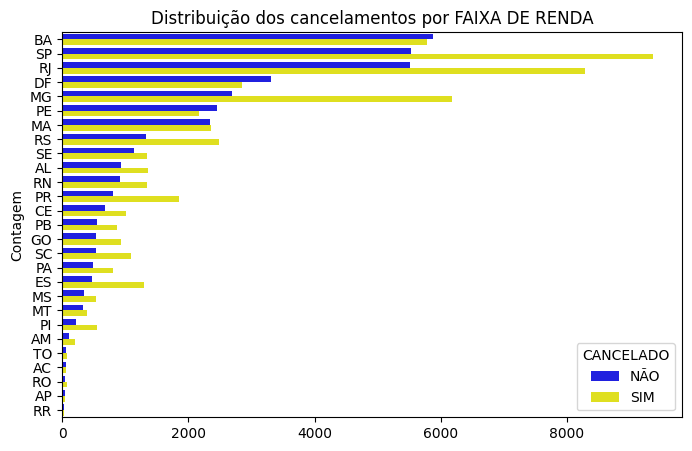

In [ ]:
#cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(y="UF", x="Contagem", hue="CANCELADO", data=cont_agrupada_UF_df, palette=palette)

#configura os eixos do gráfico
plt.ylabel("Contagem")
plt.xlabel("")
plt.title("Distribuição dos cancelamentos por FAIXA DE RENDA")
plt.xticks(rotation=0)
plt.legend(title="CANCELADO")

#exibe o gráfico
plt.show()

Distribuições das variáveis

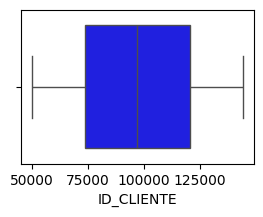

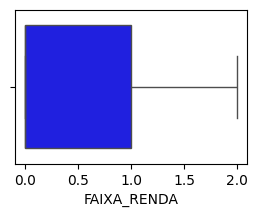

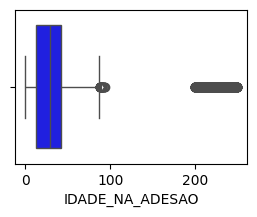

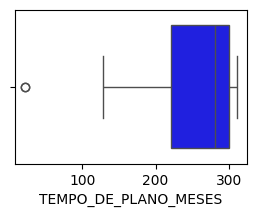

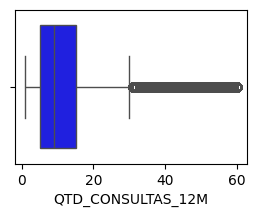

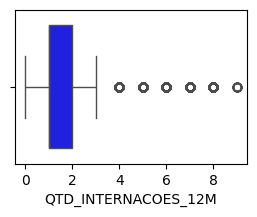

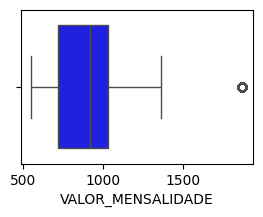

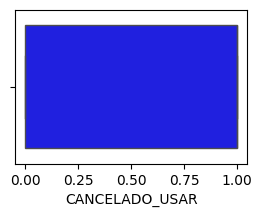

In [ ]:
# Gráfico de Boxplot
import warnings
warnings.filterwarnings("ignore")

for i in dados.select_dtypes(include="number").columns:
  plt.figure(figsize=(3, 2))  #tamanho da imagem
  sns.boxplot(data=dados, x=i, color="blue")
  plt.show()

Boxplot para verificar outliers

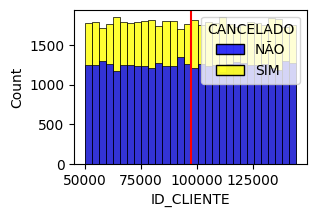

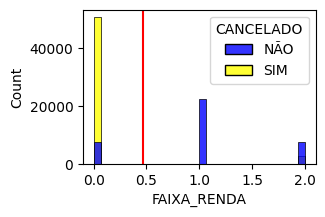

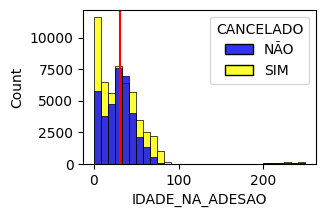

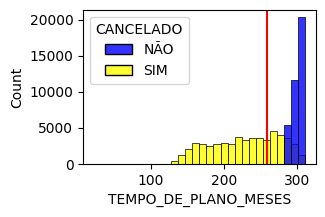

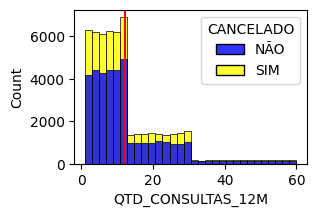

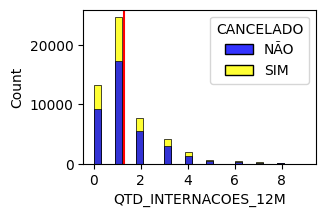

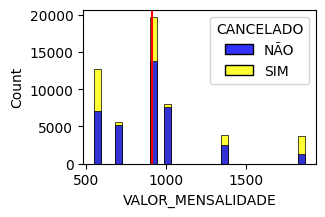

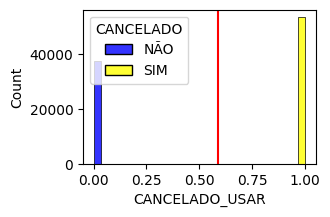

In [ ]:
#histograma com média
for i in dados.select_dtypes(include="number").columns:

    plt.figure(figsize=(3, 2))  #tamanho da imagem

    #histograms
    sns.histplot(data=dados,
                      x=i,
                      bins = 30,
                      hue = 'CANCELADO',
                      palette=palette,
                      alpha=0.8
                )
    #médica em vertical e vermelho
    plt.axvline(np.mean(dados[i]), color="red")

Removendo os outliers

In [ ]:
#selecionando os nomes da variáveis numéricas
dados.select_dtypes(include="number").columns

Index(['ID_CLIENTE', 'FAIXA_RENDA', 'IDADE_NA_ADESAO', 'TEMPO_DE_PLANO_MESES',
       'QTD_CONSULTAS_12M', 'QTD_INTERNACOES_12M', 'VALOR_MENSALIDADE',
       'CANCELADO_USAR'],
      dtype='object')

In [ ]:
#função para calcular os percentis das variáveis e o interquartil
def out (col):
  q1, q3 = np.percentile(col, [25, 75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw, uw

In [ ]:
#remove os outliers
for i in ['IDADE_NA_ADESAO', 'TEMPO_DE_PLANO_MESES','QTD_CONSULTAS_12M', 'QTD_INTERNACOES_12M', 'VALOR_MENSALIDADE']:
  lw,uw=out(dados[i])
  dados[i]=np.where(dados[i]<lw, lw, dados[i])
  dados[i]=np.where(dados[i]>uw, uw, dados[i])

Verificando se os outliers foram removidos

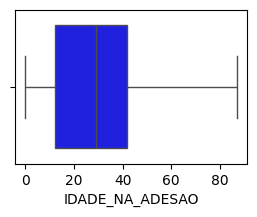

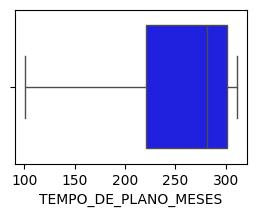

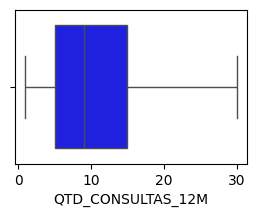

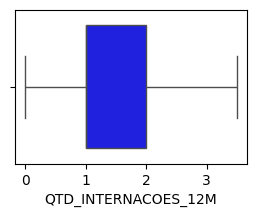

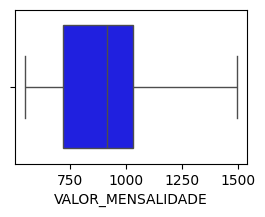

In [ ]:
#grafico boxplot

for i in ['IDADE_NA_ADESAO', 'TEMPO_DE_PLANO_MESES','QTD_CONSULTAS_12M', 'QTD_INTERNACOES_12M', 'VALOR_MENSALIDADE']:
  plt.figure(figsize=(3, 2))  #tamanho da imagem
  sns.boxplot(data=dados, x=i, color="blue")
  plt.show()

In [ ]:
#verificando o tamanho final do banco de dados após a limpeza
dados.shape

(90765, 15)

In [ ]:
#verifica se as classes da variável resposta são balanceadas
COUNT2 = dados['CANCELADO'].value_counts()
COUNT2

,count
CANCELADO,
SIM,53393
NÃO,37372


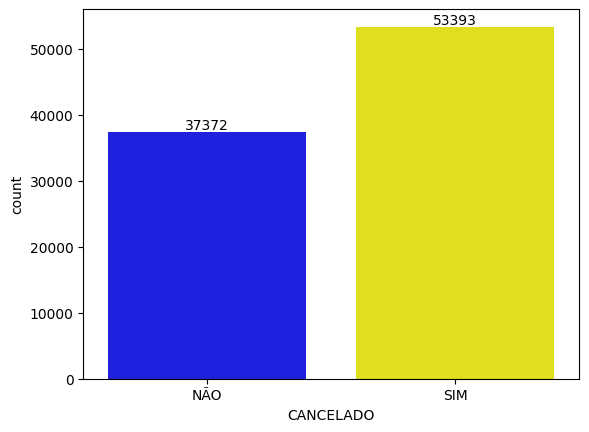

In [ ]:
#gráfico de barras Churn
ax = sns.countplot(data=dados, x='CANCELADO', hue='CANCELADO', palette=palette)

#legenda
#ax.legend(labels=['não churn', 'churn'])

#rótulos de dados
for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição x centralizada
        altura + 0.5,                    # posição y (acima da barra)
        int(altura),                     # valor da contagem
        ha='center',                     # alinhamento horizontal
        va='bottom'                      # alinhamento vertical
    )
plt.show()

In [ ]:
print("Diferença de: ",COUNT1[0]-COUNT2[0], "na classe CHURN")
print("Diferença de: ",COUNT1[1]-COUNT2[1], 'na classe NÃO CHURN')

Diferença de:  6048 na classe CHURN
Diferença de:  4250 na classe NÃO CHURN


Gráfico de dispersão para entender a relação das variáveis explicativas com a variável resposta

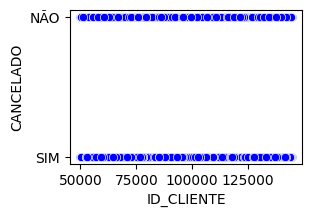

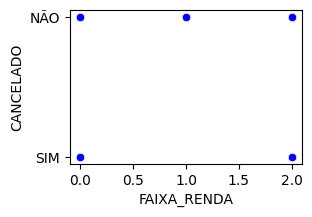

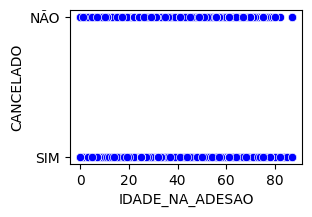

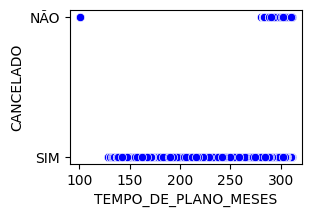

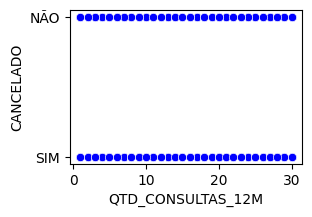

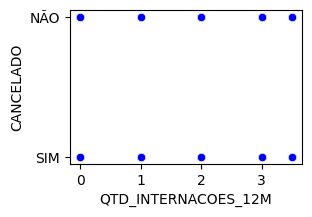

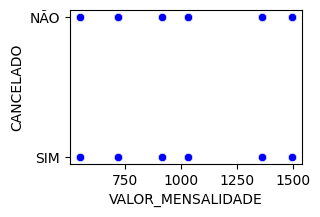

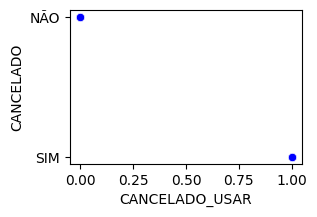

In [ ]:
# Gráfico de Dispersão
import warnings
warnings.filterwarnings("ignore")

for i in dados.select_dtypes(include="number").columns:
  plt.figure(figsize=(3, 2))  #tamanho da imagem
  sns.scatterplot(data=dados, x=i, y= "CANCELADO", color="blue")
  plt.show()

*Observação: clientes com mais de 250 meses de contrato tem maior chance de não cancelar o plano*

In [ ]:
dados.head()

,ID_CLIENTE,TITULARIDADE,CANCELADO,FAIXA_RENDA,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,SEXO,UF,INADIMPLENTE,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR,FAIXA_RENDA_USAR,faixa_tempo_plano
0,53100,TITULAR,NÃO,1.0,39.0,302.0,FEMININO,RJ,NAO_INADIMPLENTE,12.0,1.0,1030.000000,0.0,Média renda,acima de 250 meses
1,140400,TITULAR,NÃO,1.0,24.0,307.0,FEMININO,BA,NAO_INADIMPLENTE,4.0,0.0,720.000000,0.0,Média renda,acima de 250 meses
2,105059,TITULAR,NÃO,1.0,1.0,295.0,MASCULINO,MG,NAO_INADIMPLENTE,6.0,3.5,916.413774,0.0,Média renda,acima de 250 meses
3,82963,TITULAR,NÃO,1.0,36.0,294.0,MASCULINO,RJ,NAO_INADIMPLENTE,21.0,1.0,1030.000000,0.0,Média renda,acima de 250 meses
4,97768,TITULAR,SIM,0.0,20.0,259.0,FEMININO,RN,NAO_INADIMPLENTE,30.0,0.0,550.000000,1.0,Baixa renda,acima de 250 meses


In [ ]:
#remove colunas indesejadas
dados_modelo = dados.drop(columns=['FAIXA_RENDA_USAR','faixa_tempo_plano','CANCELADO'])
#cria dummies
dados_modelo = pd.get_dummies(data=dados_modelo, columns=['TITULARIDADE', 'FAIXA_RENDA', 'SEXO', 'UF',
       'INADIMPLENTE'], drop_first= True)
dados_modelo


,ID_CLIENTE,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,CANCELADO_USAR,TITULARIDADE_TITULAR,FAIXA_RENDA_1.0,FAIXA_RENDA_2.0,...,UF_RJ,UF_RN,UF_RO,UF_RR,UF_RS,UF_SC,UF_SE,UF_SP,UF_TO,INADIMPLENTE_NAO_INADIMPLENTE
0,53100,39.0,302.0,12.0,1.0,1030.000000,0.0,True,True,False,...,True,False,False,False,False,False,False,False,False,True
1,140400,24.0,307.0,4.0,0.0,720.000000,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
2,105059,1.0,295.0,6.0,3.5,916.413774,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,82963,36.0,294.0,21.0,1.0,1030.000000,0.0,True,True,False,...,True,False,False,False,False,False,False,False,False,True
4,97768,20.0,259.0,30.0,0.0,550.000000,1.0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101057,101190,78.0,212.0,12.0,0.0,916.413774,1.0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
101058,102774,78.0,190.0,10.0,2.0,1495.000000,1.0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
101060,64406,14.0,162.0,3.0,1.0,550.000000,1.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
101061,137116,75.0,142.0,5.0,1.0,1495.000000,1.0,True,False,True,...,True,False,False,False,False,False,False,False,False,True


Separação da base em treino e teste

In [ ]:
#separação em X e y
X = dados_modelo.drop(columns=['ID_CLIENTE', 'CANCELADO_USAR'], axis=1).copy()
y = dados_modelo['CANCELADO_USAR'].copy()

In [ ]:
#separa os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
y_train.value_counts()

,count
CANCELADO_USAR,
1.0,42703
0.0,29909


Padronização dos dados

In [ ]:
#padroniza as colunas
padronizador = StandardScaler()

In [ ]:
#Separa as variáveis numéricas e categóricas
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(exclude=['number']).columns

In [ ]:
#inicia o scaler
scaler = StandardScaler()

#ajusta apenas no treino para evitar o vazamento de dados (data leakage)
X_train_num_padronizado = pd.DataFrame(
    #transforma o treino
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

In [ ]:
#transforma o teste
X_test_num_padronizado = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

In [ ]:
#separa as variáveis categóricas originais
X_train_cat = X_train[cat_cols].copy()
X_test_cat = X_test[cat_cols].copy()

#concatena os dados novamente
X_train_padronizado = pd.concat([X_train_num_padronizado, X_train_cat], axis=1)
X_test_padronizado = pd.concat([X_test_num_padronizado, X_test_cat], axis=1)


In [ ]:
X_train_padronizado.head()

,IDADE_NA_ADESAO,TEMPO_DE_PLANO_MESES,QTD_CONSULTAS_12M,QTD_INTERNACOES_12M,VALOR_MENSALIDADE,TITULARIDADE_TITULAR,FAIXA_RENDA_1.0,FAIXA_RENDA_2.0,SEXO_MASCULINO,UF_AL,...,UF_RJ,UF_RN,UF_RO,UF_RR,UF_RS,UF_SC,UF_SE,UF_SP,UF_TO,INADIMPLENTE_NAO_INADIMPLENTE
78023,-0.281572,0.620346,1.246544,-0.210740,-0.675984,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
45146,1.838941,-0.476681,-0.273386,-0.210740,0.079996,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
63715,-1.465114,0.021967,2.064968,-0.210740,-1.330301,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
36573,-1.415800,-0.476681,0.077367,1.726867,-1.330301,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
78573,0.359513,-0.855654,2.064968,-0.210740,0.517181,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


##Random Forest

Etapa de ajuste e validação do modelo

In [ ]:
#dicionário de parâmetros para ser utilizado no gridsearch
params = {'max_depth':[2,3,4,5],
          'class_weight':[None, 'balance']}

#armazenando o modelo na variável model
Randon_Forest = RandomForestClassifier()
model_RF = GridSearchCV(estimator = Randon_Forest, param_grid = params, cv= 5, scoring= 'roc_auc')

#ajustando o modelo com o gridSearch (poderia ser o optuna)
model_RF.fit(X_train_padronizado, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balance'],
                         'max_depth': [2, 3, 4, 5]},
             scoring='roc_auc')

In [ ]:
#testando o modelo
y_pred_proba_RF = model_RF.predict_proba(X_test_padronizado)
y_pred_RF = model_RF.predict(X_test_padronizado)
#área abaixo da curva roc calculada para base de teste
auc = roc_auc_score(y_test, y_pred_proba_RF[:, 1])

In [ ]:
#parâmetros e métricas do modelo de ajuste e teste
print(f'Parâmetros : {model_RF.best_params_}')
print(f'AUC Treino : {model_RF.best_score_:.2f}')
print(f'AUC Teste : {auc:.2f}')

Parâmetros : {'class_weight': None, 'max_depth': 5}
AUC Treino : 0.99
AUC Teste : 0.99


Teste do modelo final

In [ ]:
# utiliza melhores parâmetros testados anteriormente
params = {'max_depth':[5],
          'class_weight':[None]}
#modelo
Random_Forest = RandomForestClassifier()
model_RF = GridSearchCV(estimator = Random_Forest, param_grid = params, cv= 10, scoring= 'accuracy')

#ajustando o modelo
model_RF.fit(X_train_padronizado, y_train)



GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None], 'max_depth': [5]},
             scoring='accuracy')

In [ ]:
# dataframe de previsao para a matriz de confusão
matriz_confusao_RF = pd.DataFrame({'observado': y_test, 'predito': y_pred_proba_RF[:, 1]})
matriz_confusao_RF

,observado,predito
25479,1.0,0.873883
46174,0.0,0.222015
38826,0.0,0.189508
50944,0.0,0.277997
42739,1.0,0.939686
...,...,...
95771,0.0,0.114143
3514,1.0,0.904445
8978,1.0,0.842475
42323,1.0,0.949501


In [ ]:
#ponto de corte ajustável para avaliação da matriz de confusão e os respectivos erros tipo I e tipo II
#construção de função para a definição da matriz de confusão

def matriz_confusao(predicts, observado, cutoff):
    values = predicts.values
    predicao_binaria = []
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('Verdadeiro')
    plt.ylabel('Classificado')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)
    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

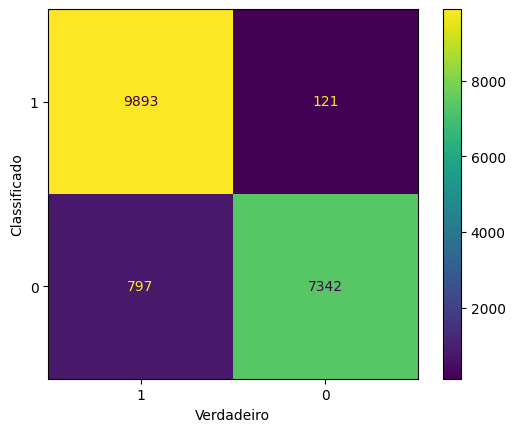

,Sensitividade,Especificidade,Acurácia
0,0.925444,0.983787,0.94943


In [ ]:
#matriz de confusão
matriz_confusao(observado= matriz_confusao_RF['observado'],
                predicts= matriz_confusao_RF['predito'],
                cutoff=0.5)

In [ ]:
print(f'Acurácia de treino: {model_RF.best_score_:.2f}')
#acurácia de teste
acuracia_teste = accuracy_score(y_test, y_pred_RF)

#Avaliar o modelo
print(f"\033[92m Acurácia de teste: {acuracia_teste:.2f}")
print("\033[91m \n----------------------------------\n")
print("\033[92m Relatório de Classificação:\n", classification_report(y_test, y_pred_RF))
print("\033[91m \n----------------------------------\n")
print("\033[92m Precisão:\n", round(precision_score(y_test, y_pred_RF),2))


Acurácia de treino: 0.95
 Acurácia de teste: 0.95
 
----------------------------------

 Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7463
         1.0       0.99      0.93      0.96     10690

    accuracy                           0.95     18153
   macro avg       0.94      0.95      0.95     18153
weighted avg       0.95      0.95      0.95     18153

 
----------------------------------

 Precisão:
 0.99


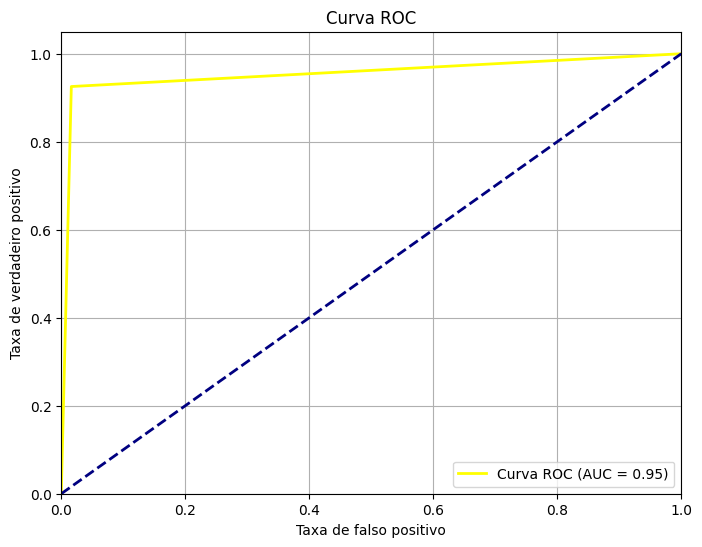

In [ ]:
#curva ROC e a área abaixo da curva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc = roc_auc_score(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

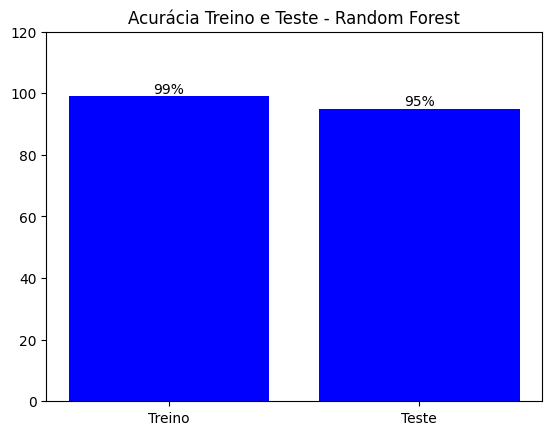

In [ ]:
# gráfico de barras comparando a acurácia de treino e teste
categories = ['Treino', 'Teste']
values = [99, 95]

fig, ax = plt.subplots()
bar_container = ax.bar(categories, values, color='blue')
ax.set(ylabel='', title='Acurácia Treino e Teste - Random Forest', ylim=(0, 120))
ax.bar_label(bar_container, fmt='{:,.0f}%')
plt.show()

In [ ]:
# armazena 0 melhor modelo
melhor_modelo_RF = model_RF.best_estimator_

#grau de importância das variáveis
importances = melhor_modelo_RF.feature_importances_

#dataFrame com nomes das variáveis e suas importâncias
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibe as variáveis ordenadas por grau de importância

display(feature_importance)

,Feature,Importance
1,TEMPO_DE_PLANO_MESES,0.559205
6,FAIXA_RENDA_1.0,0.258504
35,INADIMPLENTE_NAO_INADIMPLENTE,0.100851
7,FAIXA_RENDA_2.0,0.054059
0,IDADE_NA_ADESAO,0.010909
18,UF_MG,0.004484
4,VALOR_MENSALIDADE,0.003761
12,UF_BA,0.002477
14,UF_DF,0.001123
23,UF_PE,0.000853


##Regressão logística

In [ ]:
#modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000)

# Definir os parâmetros a serem testados

param_grid_RL = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

strat_RL = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criar o objeto GridSearchCV

model_RL = GridSearchCV(logistic_model, param_grid_RL, cv=strat_RL, scoring='accuracy', verbose=1, n_jobs=-1)

# Treinar o modelo com a busca de hiperparâmetros
model_RL.fit(X_train_padronizado, y_train)

#print("Melhores hiperparâmetros:", model.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
print("\033[92m Melhores hiperparâmetros:\n\n", "\033[97m", model_RL.best_params_)
coefficients = model_RL.best_estimator_.coef_
coefficients

 Melhores hiperparâmetros:

  {'penalty': 'l2', 'solver': 'liblinear'}


array([[-2.06579371e-02, -8.49279162e+00, -2.25624519e-03,
         3.20380402e-02,  1.40765467e-01,  4.36589140e+00,
        -8.11691018e+00, -2.90720293e+00,  2.55229118e-02,
         1.79412535e-01,  4.93174150e-01, -7.16756482e-01,
        -3.21956455e-01,  6.76870544e-01, -2.37162920e-01,
         5.28746278e-01,  1.50182147e-01, -6.65957210e-01,
         7.43775524e-01,  3.34521872e-01,  4.40086792e-01,
         1.27659431e-01,  1.52105695e-01, -9.27380391e-02,
         1.47636513e-01,  7.76973174e-01,  5.47851327e-01,
         1.98408090e-01, -9.21896552e-01, -5.96475470e-01,
         9.66108203e-01,  7.57095414e-01, -5.16915265e-01,
         4.09512432e-01,  5.67060412e-02, -1.94391807e+00]])

In [ ]:
#nomes das colunas
nomes_variaveis = X.columns
nomes_variaveis

Index(['IDADE_NA_ADESAO', 'TEMPO_DE_PLANO_MESES', 'QTD_CONSULTAS_12M',
       'QTD_INTERNACOES_12M', 'VALOR_MENSALIDADE', 'TITULARIDADE_TITULAR',
       'FAIXA_RENDA_1.0', 'FAIXA_RENDA_2.0', 'SEXO_MASCULINO', 'UF_AL',
       'UF_AM', 'UF_AP', 'UF_BA', 'UF_CE', 'UF_DF', 'UF_ES', 'UF_GO', 'UF_MA',
       'UF_MG', 'UF_MS', 'UF_MT', 'UF_PA', 'UF_PB', 'UF_PE', 'UF_PI', 'UF_PR',
       'UF_RJ', 'UF_RN', 'UF_RO', 'UF_RR', 'UF_RS', 'UF_SC', 'UF_SE', 'UF_SP',
       'UF_TO', 'INADIMPLENTE_NAO_INADIMPLENTE'],
      dtype='object')

In [ ]:
#juntando as variáveis com seus respectivos coeficientes
feature_coefficients = dict(zip(nomes_variaveis, coefficients[0]))

#dataframe dos coeficientes e variáveis
coefficients_df = pd.DataFrame({'Variável': nomes_variaveis, 'Coeficiente': coefficients[0]}).sort_values(by='Coeficiente', ascending=False)
coefficients_df

,Variável,Coeficiente
5,TITULARIDADE_TITULAR,4.365891
30,UF_RS,0.966108
25,UF_PR,0.776973
31,UF_SC,0.757095
18,UF_MG,0.743776
13,UF_CE,0.676871
26,UF_RJ,0.547851
15,UF_ES,0.528746
10,UF_AM,0.493174
20,UF_MT,0.440087


In [ ]:
#previsões
y_pred_proba_RL = model_RL.predict_proba(X_test_padronizado)[:, 1]       #pegando apenas a segunda coluna (probabilidade de evento)
y_pred_RL = model_RL.predict(X_test_padronizado)

In [ ]:
# dataframe de previsao para a matriz de confusão
confusao_df = pd.DataFrame({'observado': y_test, 'predito': y_pred_proba_RL})
confusao_df

,observado,predito
25479,1.0,1.000000
46174,0.0,0.099363
38826,0.0,0.004183
50944,0.0,0.071430
42739,1.0,1.000000
...,...,...
95771,0.0,0.000070
3514,1.0,1.000000
8978,1.0,1.000000
42323,1.0,0.999989


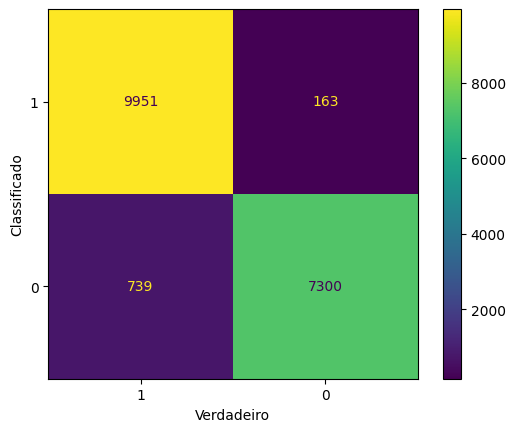

,Sensitividade,Especificidade,Acurácia
0,0.93087,0.978159,0.950311


In [ ]:
#matrize de confusão
matriz_confusao(observado= confusao_df['observado'],
                predicts= confusao_df['predito'],
                cutoff=0.7)

In [ ]:
#Avaliar o modelo

acuracia_teste_RL = accuracy_score(y_test, y_pred_RL)

print(f'Acurácia de treino: {model_RL.score(X_train_padronizado, y_train):.2f}')
print(f"\033[92mAcurácia de teste: {acuracia_teste_RL:.2f}")
print(f"\033[91m\n----------------------------------\n")
print(f"\033[92mRelatório de Classificação:\n{classification_report(y_test, y_pred_RL)}")
print(f"\033[92mPrecisão: {precision_score(y_test, y_pred_RL):.2f}")
print(f"\033[92mRecall: {recall_score(y_test, y_pred_RL):.2f}")


Acurácia de treino: 0.95
Acurácia de teste: 0.95

----------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      7463
         1.0       0.96      0.96      0.96     10690

    accuracy                           0.95     18153
   macro avg       0.95      0.95      0.95     18153
weighted avg       0.95      0.95      0.95     18153

Precisão: 0.96
Recall: 0.96


AUC: 0.9526476924451868


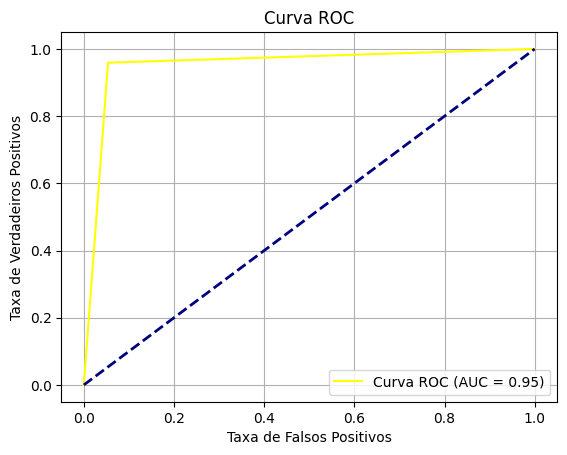

In [ ]:
#Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RL)
auc_score_RL = roc_auc_score(y_test, y_pred_RL)
print("AUC:", auc_score_RL)

plt.plot(fpr, tpr, color='yellow', label=f'Curva ROC (AUC = {auc_score_RL:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

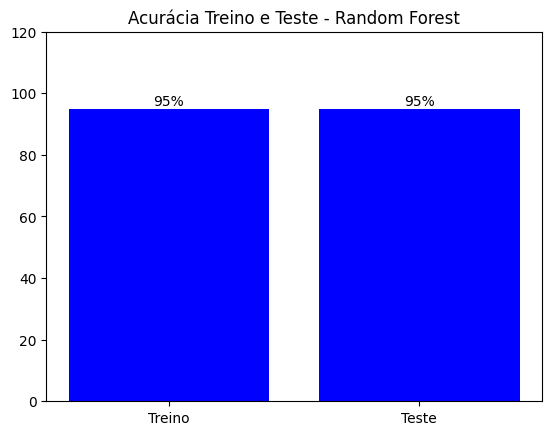

In [ ]:
# gráfico de barras comparando a acurácia de treino e teste
categories = ['Treino', 'Teste']
values = [95, 95]

fig, ax = plt.subplots()
bar_container = ax.bar(categories, values, color='blue')
ax.set(ylabel='', title='Acurácia Treino e Teste - Random Forest', ylim=(0, 120))
ax.bar_label(bar_container, fmt='{:,.0f}%')
plt.show()